# Project 1


##Data and Imports


###Data

Let's start by uploading the file with data

In [ ]:
!pip install gdown
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=1mMrKrn9aNoBCJeDS1MSgzbwbRkJPFmQ2

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 5, in <module>
    from gdown.__main__ import main
  File "/usr/local/lib/python3.10/dist-packages/gdown/__init__.py", line 4, in <module>
    from .cached_download import cached_download
  File "/usr/local/lib/python3.10/dist-packages/gdown/cached_download.py", line 12, in <module>
    from .download import download
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 12, in <module>
    import bs4
  File "/usr/local/lib/python3.10/dist-packages/bs4/__init__.py", line 37, in <module>
    from .builder import (
  File "/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py", line 626, in <module>
    from . import _html5lib
  File "/usr/local/lib/python3.10/dist-packages/bs4/builder/_html5lib.py", line 21, in <module>
    import html5lib
  File "/usr/local/lib/python3.10/dist-packages/html5lib/__init__.py", line 25, in <module>
    from .html5parser imp

###Imports

Now let's import libraries that we are going to be using in this project

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


##Exercise 1


###Convert data

Convert the file to pandas data frame


In [ ]:
data = pd.read_csv('dane_projekt1.csv', sep=';')
data

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05
...,...,...,...,...,...,...,...,...,...,...,...
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
307,309,81.61,173.70,1,2,63,9557.08,3844.10,1,3,-10668.84
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36


Let's get extra info about our data

###Information about data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            310 non-null    int64  
 1   waga          310 non-null    float64
 2   wzrost        310 non-null    float64
 3   plec          310 non-null    int64  
 4   dzieci        310 non-null    int64  
 5   wiek          310 non-null    int64  
 6   dochod        310 non-null    float64
 7   oszczednosci  310 non-null    float64
 8   jednoos       310 non-null    int64  
 9   miejsce       310 non-null    int64  
 10  wydatki_zyw   310 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 26.8 KB


From the information above and project description, we conclude following about columns:
* there are 310 entries
* all of them are non-null, so there isn't any data missing
* types are as expected
* *id* is the key in this table
* categorical columns include:

  *plec, jednoos, miejsce*
* quantitative integer columns include:
  
  *dzieci, wiek*
* quantitative float columns include:

  *waga, wzrost, dochod, oszczednosci, wydatki_zyw*

In [ ]:
data.describe()

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,155.500000,79.814742,172.726774,1.458065,2.003226,56.241935,1519.658000,945.994839,0.429032,2.003226,12.383097
std,89.633513,3.292902,6.906733,0.499044,1.352209,6.746653,1293.464325,787.601212,0.495738,0.739537,3232.382607
min,1.000000,68.890000,155.670000,1.000000,0.000000,37.000000,645.270000,-204.240000,0.000000,1.000000,-55640.190000
25%,78.250000,77.430000,167.090000,1.000000,1.000000,52.000000,966.807500,392.545000,0.000000,1.000000,199.757500
50%,155.500000,79.890000,172.815000,1.000000,2.000000,56.000000,1190.840000,741.190000,0.000000,2.000000,249.265000
75%,232.750000,82.112500,178.032500,2.000000,3.000000,61.000000,1620.460000,1270.222500,1.000000,3.000000,283.267500
max,310.000000,86.730000,190.790000,2.000000,5.000000,77.000000,17412.240000,5485.220000,1.000000,3.000000,301.690000


###Clean data

This is a table that describes certain statistics about our data. Looking at it we can conclude that data seems plausible apart from **min** *wydatki_zyw*. As *wydatki_zyw* should be a non-negative number.

In [ ]:
data[data['wydatki_zyw'] < 0]

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
69,308,77.76,171.11,1,2,56,5955.49,3521.98,1,3,-939.57
144,306,84.66,168.19,2,1,53,5103.53,3350.77,1,2,-133.78
235,310,77.87,170.23,1,5,55,17412.24,5485.22,1,1,-55640.19
266,307,77.16,163.86,1,1,48,5784.33,3774.89,1,2,-391.43
292,305,78.44,165.26,1,5,57,4929.33,3336.75,1,2,-1.06
307,309,81.61,173.70,1,2,63,9557.08,3844.10,1,3,-10668.84


As there are only 6 records with wrong values. I assume they are wrong because of mistakes in data i.e. they don't model any mechanism underlying data. They also contain *dochod* and *oszczednosci* that are > 2 * std + mean, which may cause problems with leverages later on. So I take a decision to remove them from our data.

In [ ]:
data = data[data['wydatki_zyw'] >= 0]
data.describe()

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,152.50000,79.819309,172.805757,1.463816,1.990132,56.259868,1389.315724,887.975954,0.417763,2.000000,235.571151
std,87.90146,3.303614,6.935242,0.499511,1.341112,6.782444,660.781113,668.759849,0.494004,0.740172,57.232769
min,1.00000,68.890000,155.670000,1.000000,0.000000,37.000000,645.270000,-204.240000,0.000000,1.000000,56.270000
25%,76.75000,77.415000,167.130000,1.000000,1.000000,51.750000,965.830000,384.657500,0.000000,1.000000,204.207500
50%,152.50000,79.895000,172.890000,1.000000,2.000000,56.500000,1181.350000,722.325000,0.000000,2.000000,250.465000
75%,228.25000,82.142500,178.117500,2.000000,3.000000,61.000000,1613.947500,1236.880000,1.000000,3.000000,284.110000
max,304.00000,86.730000,190.790000,2.000000,5.000000,77.000000,4780.150000,3390.590000,1.000000,3.000000,301.690000


As it can be seen it influenced columns mentioned above

###Distribution

Let's now look at distribution of our data

In [ ]:
quantitative_col = ['waga', 'wzrost', 'dzieci', 'wiek',
                    'dochod', 'oszczednosci', 'wydatki_zyw']

for col_name in quantitative_col:
    mean = data[col_name].mean()
    std = data[col_name].std()
    fig = px.histogram(data[col_name], nbins=50,
                       title=f'Histogram of {col_name}')

    # Generate the normal distribution
    x = np.linspace(data[col_name].min(), data[col_name].max(), 1000)
    scale = (data[col_name].max() - data[col_name].min()) / 37
    y = stats.norm.pdf(x, mean, std) * len(data[col_name]) * scale

    if col_name == 'dzieci':
      y = stats.norm.pdf(x, mean, std) * len(data[col_name])

    # Add normal distribution curve
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                             line=dict(color='red', width=2),
                             name='Normal Distribution'))

    # Add mean and std annotations
    fig.add_annotation(x=mean, y=max(y), text=f'Mean: {mean:.2f}',
                       showarrow=True, arrowhead=1)
    fig.add_annotation(x=mean + std, y=max(y), text=f'Std: {std:.2f}',
                       showarrow=True, arrowhead=1)

    fig.show()


From above histograms we conclude that *waga*, *wiek*, and *wzrost* (to some extent) resembles **normal distribution**

In [ ]:
quantitative_col = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']

for col_name in quantitative_col:
    stat, p_value = stats.shapiro(data[col_name])

    print(f"Shapiro-Wilk Test for {col_name}:")
    print(f"  - Statistic: {stat:.3f}")
    print(f"  - P-value: {p_value:.3f}")

Shapiro-Wilk Test for waga:
  - Statistic: 0.993
  - P-value: 0.159
Shapiro-Wilk Test for wzrost:
  - Statistic: 0.989
  - P-value: 0.024
Shapiro-Wilk Test for dzieci:
  - Statistic: 0.921
  - P-value: 0.000
Shapiro-Wilk Test for wiek:
  - Statistic: 0.995
  - P-value: 0.421
Shapiro-Wilk Test for dochod:
  - Statistic: 0.791
  - P-value: 0.000
Shapiro-Wilk Test for oszczednosci:
  - Statistic: 0.929
  - P-value: 0.000
Shapiro-Wilk Test for wydatki_zyw:
  - Statistic: 0.878
  - P-value: 0.000


$H_0$ - sample comes from normal distribution

Shapiro-Wilk test confirms our observation. We can't reject $H_0$ for *waga* (P-value = 0.159) and *wiek* (P_value = 0.421) with $\alpha$ = 0.05. And *wzrost* (P_value = 0.024) couldn't be rejected with $\alpha$ = 0.02 (That's why I wrote that it resembles normal distribution to some extent).

##Exercise 2


###Quantitative Correlation

In this exercise we are going to check independence and correlation between variables

Let's start with correlation between quantitative variables

<Axes: >

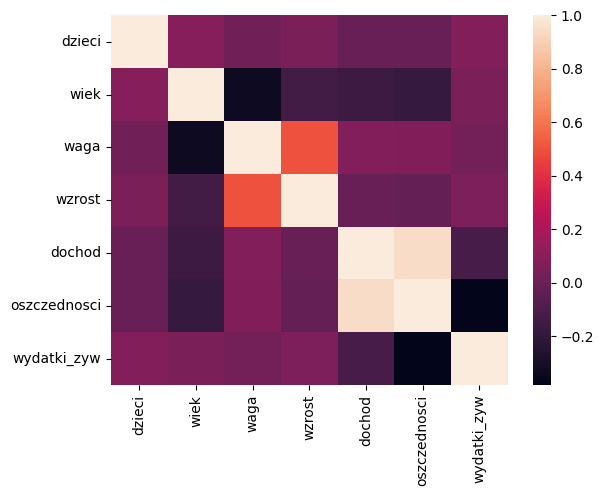

In [ ]:
quantitative_data = data[['dzieci', 'wiek', 'waga', 'wzrost',
                          'dochod', 'oszczednosci', 'wydatki_zyw']]
sns.heatmap(quantitative_data.corr())

As we can see from the heatmap there are some strong/moderate correlation between:
- dochod and oszczednosci ~0.9
- waga and wzrost ~0.5
- waga and wiek ~ -0.4
- oszednosci and wydatki_zyw ~ -0.4

Between the rest of variables there is rather weak correlation that ranges from -0.2 to 0.2

Let's now test what correlations are statistically significant using pearsonr test. We need to point out that the p_value calculations might not be accurate if distribution deviates much from normal distribution. We assume normal distribution in *wiek*, *waga* and *wzrost* (to some extent)

In [ ]:
variables = ['dzieci', 'wiek', 'waga', 'wzrost', 'dochod', 'oszczednosci', 'wydatki_zyw']
alfa = 0.05

print("Statistically significant correlations with alfa=0.05:")
print()
for variable1 in variables:
    for variable2 in variables:
        if variable1 < variable2:
          correlation_coef, p_value = stats.pearsonr(quantitative_data[variable1],
                                                    quantitative_data[variable2])
          if (p_value < alfa and variable1 != variable2):
            print(f"{variable1} and {variable2}: correlation: {correlation_coef:.3f} p_value: {p_value:.3f}")




Statistically significant correlations with alfa=0.05:

wiek and wzrost: correlation: -0.136 p_value: 0.018
waga and wiek: correlation: -0.338 p_value: 0.000
waga and wzrost: correlation: 0.499 p_value: 0.000
dochod and wiek: correlation: -0.164 p_value: 0.004
dochod and oszczednosci: correlation: 0.943 p_value: 0.000
dochod and wydatki_zyw: correlation: -0.121 p_value: 0.035
oszczednosci and wiek: correlation: -0.184 p_value: 0.001
oszczednosci and wydatki_zyw: correlation: -0.383 p_value: 0.000


###Qualitative Correlation

Now let's examine independence between categorical variables using ch2_contigency test

In [ ]:
qualitative_col = ['plec', 'jednoos', 'miejsce']

for i in range(len(qualitative_col)):
    for j in range(i+1, len(qualitative_col)):
        col1 = qualitative_col[i]
        col2 = qualitative_col[j]

        contingency_table = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

        print(f"Chi-squared test between {col1} and {col2}:")
        print("Chi-squared statistic:", chi2)
        print("p-value:", p)
        print()



Chi-squared test between plec and jednoos:
Chi-squared statistic: 0.13841187645610253
p-value: 0.7098649541109077

Chi-squared test between plec and miejsce:
Chi-squared statistic: 2.9973658607422933
p-value: 0.22342423171950018

Chi-squared test between jednoos and miejsce:
Chi-squared statistic: 0.5238551616221235
p-value: 0.7695667530897057



$H_0$ - variables are independent

So with P-values >> $\alpha$ = 0.05 we are not able to reject null hypothesis. Thus we assume that variables are independent

###Quantitative-Qualitative Correlation

Additionally, we are going to test independence between quantitative (we assumed to have normal distibution) and categorical values by comparing means of distribution in given categories. Using T-test for two samples. We assume that *wiek*, *waga* and *wzrost* have normal distribution. And that we accurately estimate variance of those distributions.

For *plec*:

In [ ]:
variables = ['wiek', 'waga', 'wzrost']

for variable in variables:
    data_female = data[data['plec'] == 1][variable]
    data_male = data[data['plec'] == 2][variable]
    t_statistic, p_value = stats.ttest_ind(data_female, data_male)
    print("Variable:", variable)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Variable: wiek
t-statistic: 2.578108153953132
p-value: 0.010407979602173175

Variable: waga
t-statistic: -12.62201860713474
p-value: 1.2798052891845044e-29

Variable: wzrost
t-statistic: -19.069346105343563
p-value: 9.195672601599911e-54



With $\alpha$ = 0.05 we conclude there is statistically significant difference in means for variable *plec* in: *wiek*, *waga*, *wzrost*

For *jednoos*

In [ ]:
for variable in variables:
    data_0 = data[data['jednoos'] == 0][variable]
    data_1 = data[data['jednoos'] == 1][variable]
    t_statistic, p_value = stats.ttest_ind(data_0, data_1)
    print("Variable:", variable)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Variable: wiek
t-statistic: 1.2873984486885188
p-value: 0.19894118623592025

Variable: waga
t-statistic: -0.6142550389062196
p-value: 0.5395092660312442

Variable: wzrost
t-statistic: -0.12738056870650874
p-value: 0.898723968470672



With $\alpha$ = 0.05 we conclude there is statistically significant difference in means for variable *jednoos* in: *dochod*, *oszczednosci*, *wydatki_zyw*

for *miejsce*

In [ ]:
for variable in variables:
    data_0 = data[data['miejsce'] != 3][variable]
    data_1 = data[data['miejsce'] == 3][variable]
    t_statistic, p_value = stats.ttest_ind(data_0, data_1)
    print("Variable:", variable)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    print()

Variable: wiek
t-statistic: 0.9977978861880549
p-value: 0.31917617543527044

Variable: waga
t-statistic: 0.8035511522487423
p-value: 0.4222882493403233

Variable: wzrost
t-statistic: 0.13784151954942234
p-value: 0.8904575280530533



There are no significant differences in means based on *miejsce* (Checked for each size i.e. 1, 2, 3 separately)

##Excercise 3

###Scatter plots

In this exercise we want to conduct Exploratory data analysis

*wydatki_zyw* vs quantitative variables

In [ ]:
quantitative_variables = ['dzieci', 'wiek', 'waga', 'wzrost', 'dochod', 'oszczednosci']

for variable in quantitative_variables:
    fig = px.scatter(data_frame=data, x=variable, y='wydatki_zyw')
    fig.update_layout(
        title=f"Scatter plot between {variable} and wydatki_zyw",
        xaxis_title=variable,
        yaxis_title="wydatki_zyw",
        margin=dict(l=50, r=50, t=50, b=50),
    )
    fig.show()

Scatter plot between *oszczednosci* and *wydatki_zyw*:

First of all we see negative correlation between those variabels. This is what we expect based on previous pearsonr test. We can also observe strong heteroscedasticity.

Scatter plot between *dochod* and *wydatki_zyw*:

Since *dochod* and *oszczednosci* are strongly correlated based on previous exercise. We can observe similar features as in above plot. There is negative correlation as well as strong heteroscedasticity.

Rest of scatter plots:

Rest of plots look more or less like random noise which is plausible based on lack of correlation inferred from previous exercise.

###Box plots

Box plot for each *miejsce* and some quantitative value. I decided to choose *wydatki_zyw*

In [ ]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Miejsce 1", "Miejsce 2", "Miejsce 3"))

for i in [1, 2, 3]:
    data_filtered = data[data['miejsce'] == i]
    fig.add_trace(go.Box(y=data_filtered['wydatki_zyw'], name=f"Miejsce {i}"), row=1, col=i)

fig.update_layout(title="Box plot wydatki_zyw in different places")

max_value = data['wydatki_zyw'].max()
min_value = data['wydatki_zyw'].min()

for i in [1, 2, 3]:
    fig.update_yaxes(range=[min_value, max_value], title_text="Wydatki na życie", row=1, col=i)
    fig.update_xaxes(title_text="Miejsce", row=1, col=i)

fig.show()

Based on Box plots we conclude that Miejsce 1 has the lowest median, q1 and q3. And it deviates the most. Miejsce 2 has the highest median and also have some observations below lower fence that might be considered outliers. Miejsce 3 is similar to Miejsce 2 but has slightly smaller median and also have some outliers. After all boxplots for each Miejsce are rather more similar than different.

###Stacked bar chart

Stacked bar chart for *plec* with number of *jednoos*

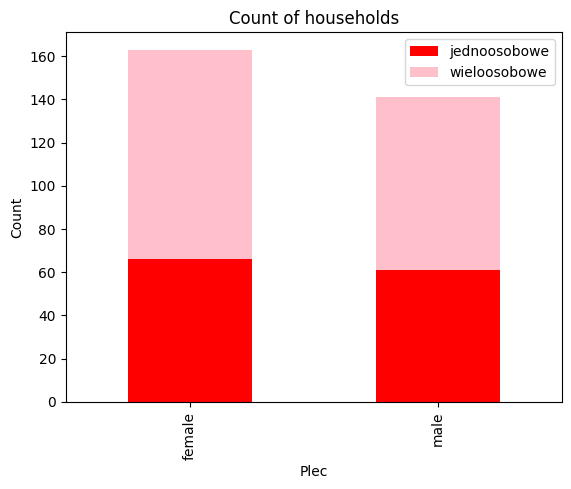

In [ ]:
data_household = pd.DataFrame({
    'jednoosobowe': [
        ((data['plec'] == 1) & (data['jednoos'] == 1)).sum(),
        ((data['plec'] == 2) & (data['jednoos'] == 1)).sum()
    ],
    'wieloosobowe': [
        ((data['plec'] == 1) & (data['jednoos'] == 0)).sum(),
        ((data['plec'] == 2) & (data['jednoos'] == 0)).sum()
    ]
}, index=['female', 'male'])

# Plotting the stacked bar chart
data_household.plot(kind='bar', stacked=True, color=['red', 'pink'])

# Add Title and Labels
plt.title('Count of households')
plt.xlabel('Plec')
plt.ylabel('Count')

plt.show()

From this plot we can conclude that more females live in multi-person households - both absolute and relative to number of females.

###Extra plots

jednoos - mean wydatki_zyw

In [ ]:
mean_wydatki = data.groupby('jednoos')['wydatki_zyw'].mean().reset_index()

fig = px.bar(mean_wydatki, x='jednoos', y='wydatki_zyw',
             labels={'wydatki_zyw': 'Mean wydatki_zyw', 'jednoos': 'jednoos'},
             title='Mean of wydatki_zyw for each category of jednoos')
fig.show()

People living in multi-person households tend to spend more on food

Pie chart of people living in cities of different sizes

In [ ]:
miejsce_counts = data['miejsce'].value_counts().reset_index()
miejsce_counts.columns = ['miejsce', 'count']

fig = px.pie(miejsce_counts, values='count', names='miejsce',
             title='Distribution of people based on miejsce')
fig.show()

Most of people live in cities with 10,000-100,000 inhabitans.

Line plot between *wiek* and mean *waga*

In [ ]:
mean_oszczednosci = data.groupby('wiek')['waga'].mean().reset_index()

fig = px.line(mean_oszczednosci, x='wiek', y='waga',
              title='Mean of waga for each wiek',
              labels={'wiek': 'wiek', 'oszczednosci': 'Mean of waga'})
fig.show()

We can clearly see declining tendency in weight with age

Scatter plot between *dochod* and *oszczednosci*. There was strong correlation between them

In [ ]:
fig = px.scatter(data, x='dochod', y='oszczednosci',
                 title='Scatter Plot of Dochod vs. Oszczednosci',
                 labels={'dochod': 'Dochod', 'oszczednosci': 'Oszczednosci'})
fig.show()

It nicely shows the correlation

##Exercise 4

In this exercise we want to estimate intervals for different statistics regarding *wiek*

###Intervals for mean and std

We need assumption that *wiek* comes from normal distribution. But we have already assumed that in Exercise 1 (Distribution) based on histogram and Shapiro-Test (P-value: 0.421). So I'm not going to repeat that.

We also assume that *wiek* based on histogram is independant and identically distributed

Now since we don't know exact mean and std we need to use t-student estimation to estimate mean

In [ ]:
mean = data['wiek'].mean()
std = data['wiek'].std()
alfa = 0.01
N = data['wiek'].count()

margin_of_error = stats.t.ppf(1 - alfa/2, N - 1) * std / np.sqrt(N)

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error


print(f"Confidence Interval for mean (at {1-alfa}% level of significance):")
print(f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval for mean (at 0.99% level of significance):
(55.25, 57.27)


In order to estimate standard deviation we need to use chi-square. Assumptions are: normal distribution and i.i.d as well

In [ ]:
df = N - 1
alfa = 0.01

chi2_lower = stats.chi2.ppf(alfa/2, df)
chi2_upper = stats.chi2.ppf(1 - alfa/2, df)

var_lower = (N - 1) * std**2 / chi2_upper
var_upper = (N - 1) * std**2 / chi2_lower

std_lower = np.sqrt(var_lower)
std_upper = np.sqrt(var_upper)

print(f"Confidence Interval for Standard Deviation (at {1-alfa}% level of significance):")
print(f"({std_lower:.2f}, {std_upper:.2f})")

Confidence Interval for Standard Deviation (at 0.99% level of significance):
(6.14, 7.57)


###Intervals for quartiles

Since we have already assumed the normal distribution and i.i.d.. Let's also assume it on this one

It's worth noting, since we assume normal distribution, that mean is equal to median (q2) thus:

In [ ]:
mean = data['wiek'].mean()
std = data['wiek'].std()
alfa = 0.01
N = data['wiek'].count()

margin_of_error = stats.t.ppf(1 - alfa/2, N - 1) * std / np.sqrt(N)

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error


print(f"Confidence Interval for median (q2) (at {1-alfa}% level of significance):")
print(f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval for median (q2) (at 0.99% level of significance):
(55.25, 57.27)


Estimation is the same because we estimate the same value

Now in order to estimate q1 and q3, assuming normal distribution, let's consider following method: let $(\sigma_1, \sigma_2)$ be estimation interval for std with $\sqrt{0.99}$ confidence. Then we can estimate $(\mu_1, \mu_2)$ interval with the same confidence $\sqrt{0.99}$ assuming our std is $\sigma_2$ (That's the most pessimistic case). It means that we are $99\%$ sure that our sample comes from distribution $N(\mu, \sigma)$ where $\mu \in (\mu_1, \mu_2)$ and $\sigma \in (\sigma_1, \sigma_2)$. Thus our interval for q1 is (q1 of $N(\mu_1, \sigma_2)$, q1 of $N(\mu_2, \sigma_1)$) and similarily interval for q3 is (q3 of $N(\mu_1, \sigma_1)$, q3 of $N(\mu_2, \sigma_2)$)

In [ ]:
mean = data['wiek'].mean()
std = data['wiek'].std()
alfa = 1 - 0.99**2
N = data['wiek'].count()

df = N - 1

chi2_lower = stats.chi2.ppf(alfa / 2, df)
chi2_upper = stats.chi2.ppf(1 - alfa / 2, df)

var_lower = (N - 1) * std**2 / chi2_upper
var_upper = (N - 1) * std**2 / chi2_lower

std_lower = np.sqrt(var_lower)
std_upper = np.sqrt(var_upper)

margin_of_error = stats.norm.ppf(1 - alfa/2) * std_upper / np.sqrt(N)

lower_mean = mean - margin_of_error
upper_mean = mean + margin_of_error

z_score_q1 = stats.norm.ppf(0.25)
z_score_q3 = stats.norm.ppf(0.75)
print(f"Confidence Interval for q1 (at 99% level of significance):")
print(f"({z_score_q1 * std_upper + lower_mean:.2f}, {z_score_q1 * std_lower + upper_mean:.2f})")
print()
print(f"Confidence Interval for q3 (at 99% level of significance):")
print(f"({z_score_q3 * std_lower + lower_mean:.2f}, {z_score_q3 * std_upper + upper_mean:.2f})")

Confidence Interval for q1 (at 99% level of significance):
(50.21, 53.08)

Confidence Interval for q3 (at 99% level of significance):
(59.44, 62.31)


##Exercise 5


In this exercise we will divide society into four social classes based on *dochod* and we're going to analyze diversity of *wydatki_zyw* in each social class

###Social classes division

Let's divide our society by sorting *dochod* and partitioning observation with percentiles defined in the project description i.e. lower_class [0, 0.25), medium_class [0.25, 0.75), upper_medium_class [0.75, 0.9) and upper_class [0.9, 1]

In [ ]:
data_classes = data[['dochod', 'wydatki_zyw']].sort_values(by=['dochod']).reset_index(drop=True)
N = data_classes['dochod'].count()

lower_class_bound = int(np.ceil((N - 1) / 4))
medium_class_bound = int(np.ceil((N - 1) * 3 / 4))
upper_medium_class_bound = int(np.ceil((N - 1) * 9 / 10))

lower_class = data_classes.iloc[:lower_class_bound, :]
medium_class = data_classes.iloc[lower_class_bound:medium_class_bound, :]
upper_medium_class = data_classes.iloc[medium_class_bound:upper_medium_class_bound, :]
upper_class = data_classes.iloc[upper_medium_class_bound:, :]

###Distribution within social classes

Let's visualize distribution of *wydatki_zyw* within classes by plotting box plots

In [ ]:
fig = px.box(lower_class['wydatki_zyw'], title='Lower Class')
fig2 = px.box(medium_class['wydatki_zyw'], title='Medium Class')
fig3 = px.box(upper_medium_class['wydatki_zyw'], title='Upper Medium Class')
fig4 = px.box(upper_class['wydatki_zyw'], title='Upper Class')

fig.update_layout(title='Box plot of wydatki_zyw in Different Classes',
                  xaxis_title='Class', yaxis_title='Wydatki ZYW')

fig.update_traces(marker=dict(color='blue'))
fig2.update_traces(marker=dict(color='orange'))
fig3.update_traces(marker=dict(color='green'))
fig4.update_traces(marker=dict(color='red'))

fig.add_trace(fig2['data'][0])
fig.add_trace(fig3['data'][0])
fig.add_trace(fig4['data'][0])

fig.show()

Based on box plots we may presume that measure of diversity of distribution is highest in upper_medium class, medium and similar in upper_class and medium_class, and lowest in lower_class. Let's define a measure to check our conjecture

###Measure of diversity of distribution

Based on https://pl.wikipedia.org/wiki/Miara_zr%C3%B3%C5%BCnicowania_rozk%C5%82adu there are bunch of measures we could choose from. I'm going to choose standard deviation because it's most known measure. Thus it's easiest to interpret for most of people. Additionaly it depends on all observations contrary to range (i.e. difference between min and max). Let's compute standard deviation then:

In [ ]:
lower_class_std = lower_class['wydatki_zyw'].std()
medium_class_std = medium_class['wydatki_zyw'].std()
upper_medium_class_std = upper_medium_class['wydatki_zyw'].std()
upper_class_std = upper_class['wydatki_zyw'].std()

print("Standard Deviations for 'wydatki_zyw' variable:")
print()
print(f"Lower Class: {lower_class_std:.2f}")
print(f"Medium Class: {medium_class_std:.2f}")
print(f"Upper Medium Class: {upper_medium_class_std:.2f}")
print(f"Upper Class: {upper_class_std:.2f}")

Standard Deviations for 'wydatki_zyw' variable:

Lower Class: 31.33
Medium Class: 59.34
Upper Medium Class: 65.87
Upper Class: 56.08


Additionaly, we can check coefficient of variablity. Which divides standard deviation by mean. The coefficient of variation should be computed only for data measured on scales that have a meaningful zero, which is the case here.

In [ ]:
lower_class_mean = lower_class['wydatki_zyw'].mean()
medium_class_mean = medium_class['wydatki_zyw'].mean()
upper_medium_class_mean = upper_medium_class['wydatki_zyw'].mean()
upper_class_mean = upper_class['wydatki_zyw'].mean()

print("Coefficient of Variability for 'wydatki_zyw' variable:")
print()
print(f"Lower Class: {(lower_class_std / lower_class_mean):.2f}")
print(f"Medium Class: {(medium_class_std / medium_class_mean):.2f}")
print(f"Upper Medium Class: {(upper_medium_class_std / upper_medium_class_mean):.2f}")
print(f"Upper Class: {(upper_class_std / upper_class_mean):.2f}")

Coefficient of Variability for 'wydatki_zyw' variable:

Lower Class: 0.12
Medium Class: 0.26
Upper Medium Class: 0.33
Upper Class: 0.22


Both measures confirm our conjecture. Diversity of *wydatki_zyw* is the highest in Upper Medium Class. Second highest is in Medium Class. A bit lower in Upper Class. And lowest in Lower Class. We could draw a similar conclusion based on scatter plot *dochod* and *wydatki_zyw* from Exercise 3 where we noticed heteroscedasticity in the plot. That explains our results, maybe apart from Upper Class, because there weren't many low values of *wydatki_zyw* for big values of *dochod*.

##Exercise 6

In this exercise we are going to test some hypothesis regarding our data

###Relationship between Savings and Sex

We want to check if females have higher *oszczednosci* than males. For that we will use Mann-Whitney U test since based on Exercise 1 Shapiro-Wilk test we can't assume normal distribution. It checks that for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X. Mann-Whitney U doesn't require assumption about equal variances per say but it's highly unreliable without that assumption. Let's then measure it using Bartlett test, that compares variances. Bartlett test doesn't require extra assumptions.

In [ ]:
data_female = data[data['plec'] == 1]['oszczednosci']
data_male = data[data['plec'] == 2]['oszczednosci']

stats.bartlett(data_female, data_male)

BartlettResult(statistic=1.1361018902166709, pvalue=0.28647752711252494)

Bartlett Test

$H_0$ - $\sigma_1 = \sigma_2$

$H_1$ - $\sigma_1 \ne \sigma_2$

Our P-value is 0.28 so we can't reject null hypthesis with $\alpha$ = 0.01. Thus we assume that data_female and data_male have the same variance

After assuming equal variances let's move to Mann-Whitney U test.

In [ ]:
stats.mannwhitneyu(data_female, data_male, alternative="greater")

MannwhitneyuResult(statistic=11708.0, pvalue=0.3887370161711446)

Mann-Whitney U Test

X - random value from data_female sample

Y - random value from data_male sample

$H_0$ - $P(X > Y) = P(Y > X)$

$H_1$ - $P(X > Y) > P(Y > X)$

Our P-value is equal to 0.38 so with $\alpha$ = 0.01 we can't reject null hypothesis. So we conclude that females doesn't have statistically higher *oszczednosci* than males.



###Correlation between Savings and Proportion of Food Expenses

In order to test hypothesis that low proportion of *wydatki_zyw* / *dochod* correlates with high *oszczednosci*. We can perform pearson's r test which calculates correlation and checks statistical significance. Note that default method in scipy.stats.pearsonr requires assumption about normal distribution to be reliable. Since we can't guarantee this assumption we'll use Monte Carlo Method instead.

Let's also add columns *proporcja*

In [ ]:
data_corr = data[['oszczednosci', 'wydatki_zyw', 'dochod']].copy()
data_corr['proporcja'] = data_corr['wydatki_zyw'] / data_corr['dochod']
stats.pearsonr(data_corr['proporcja'], data_corr['oszczednosci'],
               alternative='less', method=stats.MonteCarloMethod())

PearsonRResult(statistic=-0.8882493471959102, pvalue=0.0001)

Pearson's R Test

$H_0$ - correlation between *proporcja* and *oszczednosci* is 0

$H_1$ - correlation between *proporcja* and *oszczednosci* is negative.

P-value is 0.0001 so we reject null hypothesis with $\alpha$=0.01. Thus we assume that there is a strong negative correlation between *proporcja* and *oszczednosci*. Correlation is estimated to be -0.888.

###Females' Weight > 56 kg

In this subsection we want to check if mean weight of females is bigger than 56 kilograms

We have already assumed that *waga* comes from normal distribution. Let's see if the same is true about females *waga*. Let's conduct Shapiro test for this purpose. Shapiro test doesn't require any extra assumptions.

In [ ]:
female_weight = data[data['plec'] == 1]['waga']
fig = px.histogram(female_weight)
fig.show()
stats.shapiro(female_weight)

ShapiroResult(statistic=0.9934977293014526, pvalue=0.6817423105239868)

Shapiro Test

$H_0$ - sample comes from normal distribution

$H_1$ - sample doesn't come from normal distribution

Since P-value is 0.68 we can't reject null hypthesis with $\alpha = 0.01$ we assume that female_weight comes from normal distribution.

Assuming normal distribution we are going to conduct 1 sample T-test to compare our mean with 56 kg. We use T-test because we don't know exact mean and std.

In [ ]:
stats.ttest_1samp(female_weight, popmean=56, alternative='greater')

TtestResult(statistic=107.0286338796581, pvalue=1.5711163348632539e-152, df=162)

T-test 1 sample

$H_0$ - $\mu$ = 56

$H_1$ - $\mu$ > 56

Since P_value < $\alpha$ = 0.01. We reject null hypothesis. So we conclude that females' weight in sample is greater than 56kg.

###Distribution Test

Income is often distributed with Log-normal distribution. So we are going to compare *dochod* with log-normal distribution. To estimate parameters $\mu$ and $\sigma$ of distribution let's notice that median=exp($\mu$) and mean=exp($\mu$ + $\sigma$^2/2)

In [ ]:
mu = np.log(data['dochod'].median())
sigma = np.sqrt(2 * (np.log(data['dochod'].mean()) - mu))

fig = px.histogram(data['dochod'], title="Histogram of income")
fig.show()
r = np.exp(stats.norm.rvs(loc=mu, scale=sigma, size=data['dochod'].count()))

px.histogram(r, title="Histogram of Random Log-Normal Sample")


Looking at histogram both distribution look quite similar. Let's perfom Kolmogorov-Smirnov test for goodness of fit. Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to test whether a sample came from a given reference probability distribution, or to test whether two samples came from the same distribution. It only requires assumption that variable is continous, which is obviously satisfied in this case.

In [ ]:
lognorm_dist = stats.lognorm(s=sigma, scale=np.exp(mu))

stats.kstest(data['dochod'], lognorm_dist.cdf)

KstestResult(statistic=0.18748845121811183, pvalue=7.893845528023057e-10, statistic_location=780.76, statistic_sign=-1)

Kolmogorov-Smirnov Test

($\mu$, $\sigma$) - estimated parameters

$H_0$ - *dochod* is distributed like log-norm($\mu$, $\sigma$)

$H_1$ - *dochod* is not distributed like log-norm($\mu$, $\sigma$)

P-value < $\alpha$ = 0.01 so we reject null hypothesis and thus conclude that *dochod* is not distributed like log-norm($\mu$, $\sigma$).

##Exercise 7

In this section we want to have an accurate model that predicts *wydatki_zyw* based on other predictors. Our $\alpha$ is 0.01

###Preliminary model

Let's add one-hot encoding for *miejsce* and decrease by 1 variable *plec*. Now all our categorical variables are 0-1.

In [ ]:
X = data.copy()
X = X.drop('id', axis=1)
X['plec'] -= 1
X = pd.concat([X, pd.get_dummies(X['miejsce'], drop_first=True, prefix='miejsce', dtype=int)], axis=1)
X.drop('miejsce', axis=1, inplace=True)
X = X.reset_index(drop=True)
X

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,wydatki_zyw,miejsce_2,miejsce_3
0,78.93,176.20,1,5,59,979.01,673.17,0,194.96,0,1
1,78.66,165.73,0,3,52,1043.36,543.89,0,259.20,1,0
2,74.29,171.33,0,2,57,1227.69,773.20,0,244.41,0,0
3,79.11,169.24,0,1,59,2356.74,1914.74,1,239.77,1,0
4,79.23,177.78,1,1,48,1264.95,536.29,1,291.05,0,1
...,...,...,...,...,...,...,...,...,...,...,...
299,81.26,179.94,1,1,55,1535.14,1066.30,1,249.39,0,1
300,77.59,170.41,1,3,62,1124.12,415.07,0,289.83,0,1
301,72.39,163.27,0,1,61,701.51,44.23,0,282.16,1,0
302,77.24,175.21,1,1,60,1182.43,710.35,0,246.36,0,1


Let's train model now

In [ ]:
y = X['wydatki_zyw']
X.drop('wydatki_zyw', axis=1, inplace=True)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.51e-66
Time:                        07:34:30   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          226.2224     90.953      2.487   

R^2 = 0.679. That means that our model explains 68% of variability. F-statistic has P-value < $\alpha$ which means that we reject hypothesis that all predictors are equal to 0. Also with assumed $\alpha$ only predictors *dochod* and *oszczednosci* have lower P-value than $\alpha$ which means that only for those two predictors we can reject null hypothesis (which is that they are equal 0). Thus we assume that only *dochod* and *oszczednosci* are statistically significant in this model.

###Premilinary model LINE analysis

**Linear Trend**

To check it we will look at plot fitted_value vs residuals as well as perform Ramsey RESET test (Regression Specification Error Test)

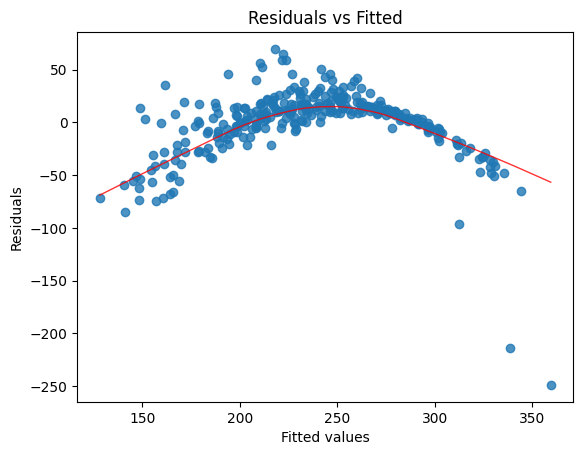

In [ ]:
model_fitted_y = results.fittedvalues
model_residuals = results.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

Here we can see that trend is not linear

Ramsey RESET test

$$H_0:X\beta+\varepsilon$$
$$H_1:f(X\beta)+\varepsilon$$

where f() is non-linear. Important: The functional form's linearity applies to the coefficients' powers; the x-variables can be transformed freely. There are several versions of this test. The version presented here estimates the original regression and obtains the fitted values. An auxiliary regression is then estimated in which successive powers of the fitted values from the primary regression become the independent variables. We test for joint insignificance of the estimated coefficients at powers greater than 1 of the fitted values in the auxiliary regression.

In [ ]:
print(sm.stats.diagnostic.linear_reset(results, power=3, test_type='fitted'))

<Wald test (chi2): statistic=654.8932342874361, p-value=6.190718500969643e-143, df_denom=2>


We reject null hypothesis (P-value < $\alpha$), thus confirm that trend is not linear

**Independant residuals (lack of autocorrelation)**

For checking homoscedasticity and lack of autocorrelation -- **line plot of residuals against the number of observations** -- it allows you to inspect if there are (particularly) problems with autocorrelation. However, you can also spot heteroscedasticity there. If the assumptions about the sphericity of the random component are satisfied, you should see something that resembles a plot of a sound wave with a constant amplitude. The fluctuations should be around zero. Single stronger fluctuations are not a problem.

In [ ]:
px.line(results.resid)

There aren't any clear trends. So we rule out auto-correlation

**Normally distributed residuals**

Let's plot histogram

In [ ]:
px.histogram(results.resid)

Let's conduct Shapiro Test

In [ ]:
stats.shapiro(results.resid)

ShapiroResult(statistic=0.8034005761146545, pvalue=6.820653191631295e-19)

Based on P-value < $\alpha$ we reject hypothesis that residuals have normal distribution

**Equal variance of residuals for all values of independent variables (homoscedasticity).**

Method for checking homoscedasticity: **scale vs location** plot. If the assumptions about the sphericity of the random disturbance are satisfied, we should see a cloud of data in the first graph. If you see triangular shapes of the data clouds, it indicates heteroscedasticity.

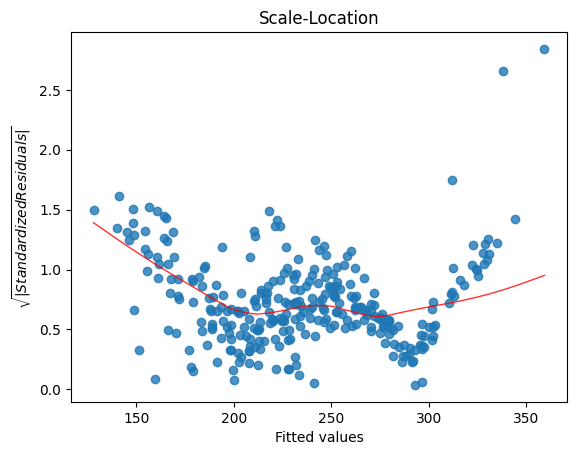

In [ ]:
# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

There is rather homoscedasticity. Apart from some outliers. Once again we can see non-linear trend.

###Preliminary model multicollinearity

To measure feature's collinearity we use variance_inflation_factor. It is statistic for  R^2 in model where given predictor is response and other predictors stays the same. Values > 10 point out collinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature          VIF
0          const  2310.884983
1           waga     1.731495
2         wzrost     2.248774
3           plec     2.625501
4         dzieci     1.028401
5           wiek     1.203732
6         dochod     9.216374
7   oszczednosci    11.222733
8        jednoos     2.422016
9      miejsce_2     1.500755
10     miejsce_3     1.499050


Based on VIF we consider *const*, *oszczednosci* and *dochod* (to some extent) to be collinear. We conclude there is strong multicollinearity in our model

###Preliminary model outliers and leverages

In Exercise 1 we have already removed some values that we considered errors. Let's plot leverage vs Studentized residuals to see if there are still some values that could be considered outliers

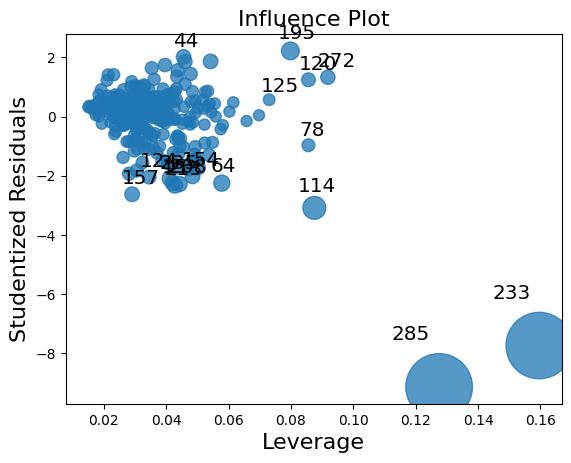

In [ ]:
sm.graphics.influence_plot(results, criterion="cooks").show()

Values with studentized residual > 3 far from 0 are considered to be outliers. In our case 285, 233 and 114. Let's look at them.

In [ ]:
temp = pd.concat([X, y], axis=1)
print(temp.iloc[[285, 233, 114]])

     const   waga  wzrost  plec  dzieci  wiek   dochod  oszczednosci  jednoos  \
285    1.0  85.08  175.06     1       1    52  4339.20       2921.25        1   
233    1.0  79.18  175.14     0       1    52  4780.15       3390.59        1   
114    1.0  78.18  167.66     0       0    65  3632.65       2463.14        1   

     miejsce_2  miejsce_3  wydatki_zyw  
285          1          0       110.60  
233          1          0       124.69  
114          1          0       216.29  


Since their studentized residual > 3 far from 0, I take descision to remove them, because they may have too much influene on the model

In [ ]:
X1 = X.drop([285, 233, 114])
y1 = y.drop([285, 233, 114])
model = sm.OLS(y1, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.98e-113
Time:                        07:34:37   Log-Likelihood:                -1356.2
No. Observations:                 301   AIC:                             2734.
Df Residuals:                     290   BIC:                             2775.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          112.0206     61.897      1.810   

Removing them significantly increased R^2 measure from 0.679 to 0.850

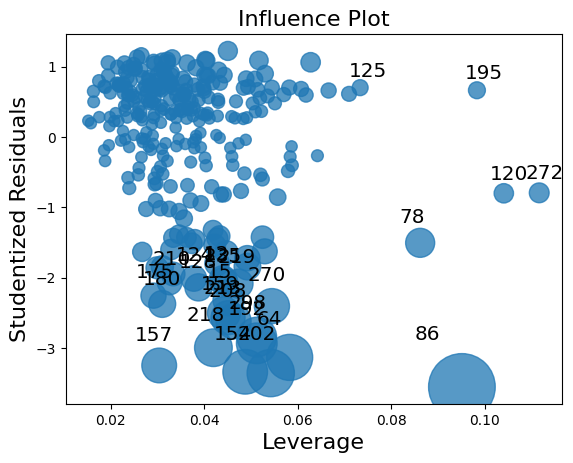

In [ ]:
sm.graphics.influence_plot(results, criterion="cooks").show()

There are no longer any huge outliers

###New model

Let's look at our current model. The problem with this model is that, even though it has high R^2 -  that is just a result of overfitting. Trend in our data is clearly non-linear so this model is not good at predicting.

In [ ]:
model = sm.OLS(y1, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.98e-113
Time:                        07:34:40   Log-Likelihood:                -1356.2
No. Observations:                 301   AIC:                             2734.
Df Residuals:                     290   BIC:                             2775.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          112.0206     61.897      1.810   

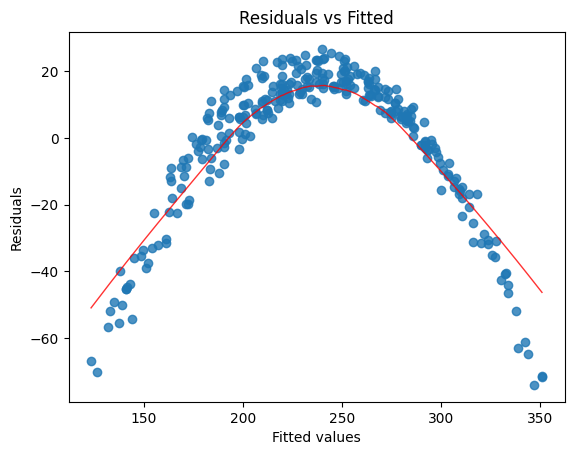

In [ ]:
model_fitted_y = results.fittedvalues
model_residuals = results.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

We want to apply certain tranformations so that trend will be linear. Since our current trend appears to be quadratic and *dochod* and *oszczednosci* appear to have significant impact on the model (Their P-values < $\alpha$). After the process of trial and error I managed to find satysfing model. We needed to add *dochod*^2, *oszczednosci*^2 and *dochod* * *oszczednosci*. We need to include *dochod* and *oszczednosci* in our model (hierarchy principle). Transforming *wydatki_zyw* in that case wasn't useful. Let's then do it:

In [ ]:
X2 = X1.copy()
y2 = y1
X2['oszczednosci x oszczednosci'] = X2['oszczednosci'] * X2['oszczednosci']
X2['dochod x dochod'] = X2['dochod'] * X2['dochod']
X2['oszczednosci x dochod'] = X2['oszczednosci'] * X2['dochod']
model = sm.OLS(y2, X2[['const', 'oszczednosci', 'dochod',
                       'oszczednosci x oszczednosci',
                       'dochod x dochod', 'oszczednosci x dochod']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.871e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        07:52:38   Log-Likelihood:                -774.66
No. Observations:                 301   AIC:                             1561.
Df Residuals:                     295   BIC:                             1584.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

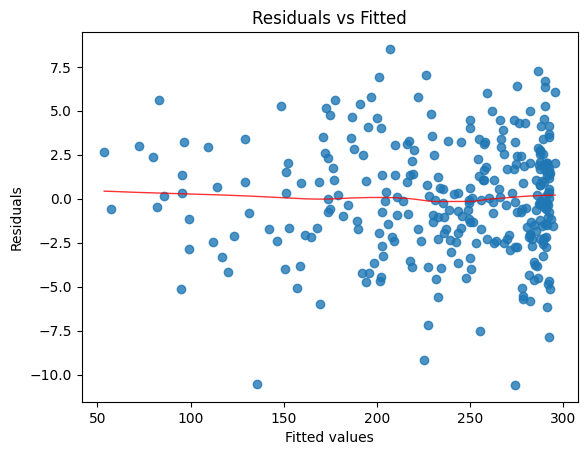

In [ ]:
model_fitted_y = results.fittedvalues
model_residuals = results.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

We succeded in obtaining linear trend. Additionally, our R^2 is 0.997, so it explains almost 100% of variance. AIC also decreased compared to previous model, which point out that our model is more effective comparing sizes.

After performing foward selection by hand to see if adding new feautures decreases AIC, I concluded that adding: *dzieci*, *wiek* and *waga* decreased AIC (AIC is a good measure because it punishes for having more features contrary to R^2)

In [ ]:
model = sm.OLS(y2, X2[['const', 'oszczednosci', 'dochod', 'dzieci', 'wiek', 'waga',
                       'oszczednosci x oszczednosci',
                       'dochod x dochod', 'oszczednosci x dochod']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.040e+05
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        08:29:03   Log-Likelihood:                -444.60
No. Observations:                 301   AIC:                             907.2
Df Residuals:                     292   BIC:                             940.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Now are AIC is lower and R-squared is equal to 1.000. Since const P-value > $\alpha$. We cannot reject null hypothesis that it's equal to 0. Let's assume then that our regression line goes through origin and remove const from model. It might be useless.

In [ ]:
model = sm.OLS(y2, X2[['oszczednosci', 'dochod', 'dzieci', 'wiek', 'waga',
                       'oszczednosci x oszczednosci',
                       'dochod x dochod', 'oszczednosci x dochod']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            wydatki_zyw   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.908e+06
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        08:31:21   Log-Likelihood:                         -446.07
No. Observations:                 301   AIC:                                      908.1
Df Residuals:                     293   BIC:                                      937.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Now all of our features are statistically significant

**I consider our model to be ready.**

###New model LINE analysis

I ommit writing explanations about each LINE step since those were explained in Preliminary model LINE analysis. Let's just focus on results.

**Linear** **trend**

Let's see trend once again

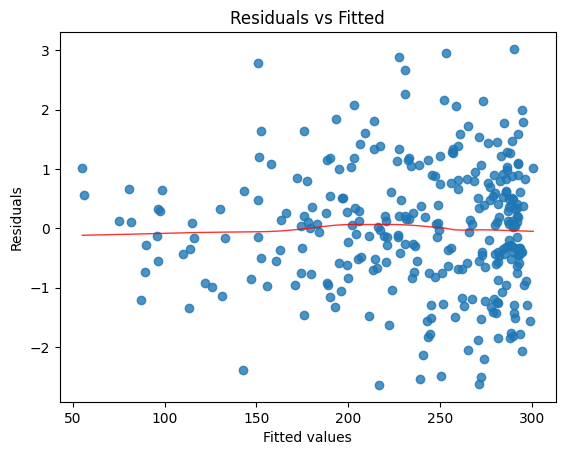

In [ ]:
model_fitted_y = results.fittedvalues
model_residuals = results.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

It is still linear, but length of residuals is two times smaller, than in model before foward search.

In [ ]:
print(sm.stats.diagnostic.linear_reset(results, power=3, test_type='fitted'))

<Wald test (chi2): statistic=2.1077555596463653, p-value=0.34858339520853837, df_denom=2>


This time based on Ramsey RESET test I can't reject hypothesis that trend is linear. P-value > $\alpha$

**Independant residuals (lack of autocorrelation)**

In [ ]:
px.line(results.resid)

There are no strong trends visible. Observations seems to be uncorrelated with previous ones. It point out lack of autocorrelation.

**Normally distributed residuals**

In [ ]:
px.histogram(results.resid)

In [ ]:
stats.shapiro(results.resid)

ShapiroResult(statistic=0.9958029389381409, pvalue=0.6009015440940857)

Based on Shapiro test we can't reject null hypothesis. P-value > $\alpha$. Thus we assume that residuals are normally distributed

**Equal variance of residuals for all values of independent variables (homoscedasticity).**

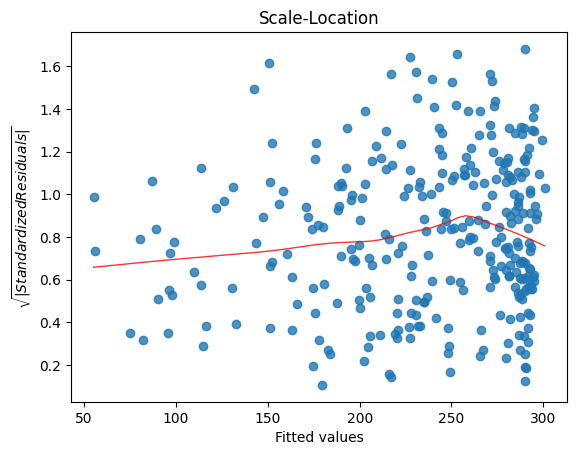

In [ ]:
# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Red line doesn't deviate that much. So we consider the model to have equal variance of residuals.

**Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X3 = X2[['oszczednosci', 'dochod', 'dzieci', 'wiek', 'waga',
                       'oszczednosci x oszczednosci',
                       'dochod x dochod', 'oszczednosci x dochod']]
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]

print(vif_data)

                       feature           VIF
0                 oszczednosci    788.949533
1                       dochod   1767.137825
2                       dzieci      3.328229
3                         wiek     57.702226
4                         waga    122.997370
5  oszczednosci x oszczednosci   1648.376167
6              dochod x dochod   5579.158890
7        oszczednosci x dochod  11758.698313


There is strong multicollinearity but we accept it to gain more predictive power. Main trade-off is coefficient estimation accuracy.

**Summary**

Our new model satisfies all LINE principles. Multicollinearity is not LINE principle.

###Features Interpretation

In this subsection we want to interpret two quantitative feautres in our model. I'll choose *waga* and *wiek* because they are easy to interpret. Let's look at our model once again

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            wydatki_zyw   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.908e+06
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        09:13:50   Log-Likelihood:                         -446.07
No. Observations:                 301   AIC:                                      908.1
Df Residuals:                     293   BIC:                                      937.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \varepsilon$

In our model *waga* is statistically significant individually (P-value < $\alpha$). And it's coefficient is equal to 0.3932. Looking at our model's linear equation we conclude that it means that with each kilogram of weight one spends 0.3932 *bajtalarów* more on food in a month.

Likewise in our model *wiek* is statistically significant individually (P-value < $\alpha$). It's coefficient is equal to -0.2393. That means that with each year of life one spends -0.2393 *bajtlarów* less on food in a month. Since *wiek* in data ranges from 37 to 77 it makes sense because we exclude children.

###Description of people with highest food spendings

In the final subsection we want to describe people that had top 10% predicted *wydatki_zyw*. Let's find them in data

In [ ]:
X3 = X2[['oszczednosci', 'dochod', 'dzieci', 'wiek', 'waga',
                       'oszczednosci x oszczednosci',
                       'dochod x dochod', 'oszczednosci x dochod']].copy()
X3['prediction'] = results.fittedvalues
# Let's sort them
X3 = X3.sort_values(by='prediction')

N = X3['prediction'].count()
bound = int(np.ceil((N - 1) * 9 / 10))
bottom = X3.iloc[:bound, :]
top = X3.iloc[bound:, :]
top

,oszczednosci,dochod,dzieci,wiek,waga,oszczednosci x oszczednosci,dochod x dochod,oszczednosci x dochod,prediction
231,2265.98,2930.63,4,47,79.02,5.134665e+06,8.588592e+06,6.640749e+06,291.687827
55,211.60,978.29,2,64,82.21,4.477456e+04,9.570513e+05,2.070062e+05,291.780990
4,536.29,1264.95,1,48,79.23,2.876070e+05,1.600099e+06,6.783800e+05,291.806341
137,-95.95,753.68,3,58,80.36,9.206403e+03,5.680335e+05,-7.231560e+04,291.850704
22,324.72,1064.46,1,51,80.41,1.054431e+05,1.133075e+06,3.456515e+05,292.045438
113,116.21,978.08,3,52,80.34,1.350476e+04,9.566405e+05,1.136627e+05,292.345318
79,303.38,1093.35,2,54,77.93,9.203942e+04,1.195414e+06,3.317005e+05,292.453899
67,121.05,895.58,0,42,78.19,1.465310e+04,8.020635e+05,1.084100e+05,292.535593
130,-30.43,771.06,3,59,77.56,9.259849e+02,5.945335e+05,-2.346336e+04,292.545010
121,466.70,1127.22,5,51,80.57,2.178089e+05,1.270625e+06,5.260736e+05,292.550822


Let's look at statistics of top 10% of predicted *wydatki_zyw* and bottom 90%.

In [ ]:
top.describe()

,oszczednosci,dochod,dzieci,wiek,waga,oszczednosci x oszczednosci,dochod x dochod,oszczednosci x dochod,prediction
count,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,31.000000
mean,756.315484,1527.081935,2.774194,52.838710,81.340323,1.477257e+06,3.224801e+06,2.052540e+06,293.958231
std,967.170507,960.511687,1.359158,6.181137,2.208601,2.698721e+06,4.164397e+06,3.431255e+06,2.171644
min,-95.950000,753.680000,0.000000,42.000000,77.560000,1.069156e+02,5.680335e+05,-7.231560e+04,291.687827
25%,122.870000,883.270000,2.000000,47.500000,80.205000,1.510035e+04,7.803174e+05,1.072836e+05,292.540302
50%,324.720000,1064.460000,3.000000,54.000000,80.850000,1.054431e+05,1.133075e+06,3.456515e+05,293.161983
75%,1080.705000,1798.800000,4.000000,56.500000,82.390000,1.464311e+06,3.509702e+06,2.226174e+06,294.852141
max,3086.410000,3893.040000,5.000000,65.000000,86.060000,9.525927e+06,1.515576e+07,1.201552e+07,300.674642


In [ ]:
bottom.describe()

,oszczednosci,dochod,dzieci,wiek,waga,oszczednosci x oszczednosci,dochod x dochod,oszczednosci x dochod,prediction
count,270.000000,270.000000,270.000000,270.000000,270.000000,2.700000e+02,2.700000e+02,2.700000e+02,270.000000
mean,880.459000,1341.705333,1.914815,56.651852,79.633630,1.123430e+06,2.089764e+06,1.480780e+06,229.808646
std,591.199489,539.135364,1.311999,6.755219,3.366557,1.434391e+06,1.983516e+06,1.701950e+06,56.198215
min,-204.240000,645.270000,0.000000,37.000000,68.890000,3.387240e+01,4.163734e+05,-1.484396e+05,55.249146
25%,455.332500,965.982500,1.000000,52.000000,77.105000,2.073380e+05,9.331222e+05,4.563626e+05,199.482111
50%,763.895000,1190.840000,2.000000,57.000000,79.690000,5.835465e+05,1.418103e+06,8.794588e+05,244.437235
75%,1215.367500,1594.115000,3.000000,61.000000,81.952500,1.477118e+06,2.541203e+06,1.888933e+06,278.562815
max,3161.680000,3808.500000,5.000000,77.000000,86.730000,9.996220e+06,1.450467e+07,1.204126e+07,291.687222


feature's coefficients

oszczednosci:                   -0.6993      
dochod:                          0.6990      
dzieci:                          1.5049      
wiek:                           -0.2393     
waga:                            0.3932      
oszczednosci x oszczednosci:    -0.0004   
dochod x dochod:                -0.0004   
oszczednosci x dochod:           0.0009

From description and coefficients we presume that people with top 10% of *wydatki_zyw* tend to have

higher: *dochod*, *dzieci*, *waga*

lower: *oszczednosci*, *wiek*

In case of *dochod* and *oszczednosci* we might be more intrested in the difference between those values

Let's test our conjecture using Mann-Whitney U Test

In [ ]:
stats.mannwhitneyu(top['dochod'] - top['oszczednosci'],
                   bottom['dochod'] - bottom['oszczednosci'], alternative="greater")

MannwhitneyuResult(statistic=7796.0, pvalue=1.820807214849215e-15)

P-value < $\alpha$. Which confirms alternative hypothesis that *dochod* - *oszczednosci* from randomly chosen top people is higher than among bottom people

Let's now test if top tends to have more **children**

In [ ]:
stats.mannwhitneyu(top['dzieci'], bottom['dzieci'], alternative="greater")

MannwhitneyuResult(statistic=5679.5, pvalue=0.0004221287843533725)

Once again alternative hypothesis is confirmed

Let's test if top is **heavier** than bottom. This time we'll use T-Test because we assumed that *waga* is normally distributed

In [ ]:
stats.ttest_ind(top['waga'], bottom['waga'], alternative='greater')

TtestResult(statistic=2.7531378756577354, pvalue=0.003131892600484461, df=299.0)

We confirm our alternative hypothesis (P-value < $\alpha$)


In the end let's see if top is younger than bottom. Again we use T-Test because we assumed that *wiek* in normally **distributed**

In [ ]:
stats.ttest_ind(top['wiek'], bottom['wiek'], alternative='less')

TtestResult(statistic=-3.0012216436076162, pvalue=0.0014578109185625259, df=299.0)

We confirm our alternative hypothesis (P-value < $\alpha$)

**Desciption of people with highest food spendings**

From above we infer that people from top 10% of predicted savings tend to have higher difference in *dochod* - *oszczednosci* as compared to the bottom group. That seems natural because it may mean that they spend more money in general. Another characteristic of the top group is that they have more children than bottom group (top mean: 2.7 vs bottom mean: 1.9). And that's statistically significant. If it comes to biological factors people from the top group tend to be heavier and younger - as confirmed by T-test.

##Final Note

In this project I used code written mainly on my one. Nevertheless, I also used code from WUM Laboratories and asked LLM's for help with certain plots.